<h2>Task 1 - Data Extraction & Initial Analysis</h2>

<h2>Task instructions</h2>

Your task is to manually extract key financial data for the last three fiscal years from the 10-K filings of Microsoft, Tesla, and Apple. Following the data collection, you will use Python to analyze this data, focusing on trends and insights that could inform the development of an AI-powered financial chatbot.

<h3>Step 1: Data extraction</h3>

<b>Navigate to the SEC's EDGAR database:</b>

 - <b>Microsoft</b>
 - <b>Tesla</b>
 - <b>Apple</b>
 
<b>Manual extraction:</b>

 - For each company, find the 10-K filings for the last three fiscal years.
 - Extract the following financial figures: Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.

<b>Organize Your Data:</b>

 - Compile the extracted data into an Excel spreadsheet for easy reference during your Python analysis.

<h3>Step 2: Preparing your Jupyter Notebook environment</h3>

<b>Install Jupyter</b> (if not already installed):

 - Install Jupyter using pip if you haven't already:

pip install notebook
 
 - Launch Jupyter Notebook:

jupyter notebook
 
 - This command should open Jupyter in your web browser.

<b>Create a new notebook:</b>

 - In the Jupyter interface, create a new notebook for your analysis.

<h3>Step 3: Python analysis in Jupyter</h3>

<b>Import pandas:</b>

 - At the beginning of your notebook, import the pandas library to work with your data.

import pandas as pd

<b>Load your data:</b>

 - Convert your Excel file to a CSV file for easier handling, then load it into a DataFrame.

df = pd.read_csv('path_to_your_csv_file.csv')

<b>Analyzing trends with pandas:</b>

 - Use pandas to calculate year-over-year changes for each financial metric. You can do this by creating new columns in your DataFrame that represent the percentage change from one year to the next.

df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100

df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
 - Explore other aggregate functions or groupings to analyze the data across different dimensions (by company, over years, etc.).

<b>Summarizing findings:</b>

 - Conclude your analysis by summarizing your findings directly in the notebook. Use markdown cells to add narrative explanations of your analysis, discussing the trends and changes in financial metrics you've identified.

<h3>Step 4: Documentation and submission</h3>

 - <b>Document your analysis:</b> Use the markdown feature in Jupyter Notebook to document your methodology, observations, and conclusions throughout the notebook.
 - <b>Export your notebook:</b> Once your analysis is complete, export your Jupyter Notebook as a PDF or HTML file for submission.
   - You can do this from the "File" menu in Jupyter, selecting "Download as" and then choosing your preferred format.

This approach allows you to focus on the core analytical aspects using pandas within a Jupyter Notebook, providing a clear, documented narrative of your financial analysis process. By the end of this task, you'll have a comprehensive understanding of how to analyze financial data programmatically, a valuable skill set for data-driven decision-making. Upload your Jupyter Notebook when done with analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the 10-k financial data
data = pd.read_excel("Task_1_Data_Extraction_&_Initial_Analysis.xlsx")

In [3]:
# check the dimensions of dataset
data.shape

(9, 9)

In [4]:
# let's look at the records
data.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions)
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021
5,Tesla,2021,53823,5644,62131,30548,2593,4517,7110
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887


In [5]:
# check datatypes
data.dtypes

Company                                                        object
Year                                                            int64
Total Revenue (in millions)                                    object
Net Income (in millions)                                        int64
Total Assets (in millions)                                      int64
Total Liabilities (in millions)                                 int64
Operating Expenses(R & D)                                       int64
Operating Expenses(Sales & Marketing, Other Administrative)     int64
Total Cash Flow from Operating Activities (in millions)         int64
dtype: object

In [6]:
# convert column Total Revenue (in millions) to int64
data['Total Revenue (in millions)'] = data['Total Revenue (in millions)'].astype('int64')
data['Year'] = data['Year'].astype(str)

In [7]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Revenue (in millions),9.0,217084.555556,133913.789489,53823.0,96773.0,198270.0,365817.0,394328.0
Net Income (in millions),9.0,59005.888889,38231.680758,5644.0,14974.0,72361.0,94680.0,99803.0
Total Assets (in millions),9.0,268669.111111,140780.645366,62131.0,106618.0,351002.0,352755.0,411976.0
Total Liabilities (in millions),9.0,176252.333333,112621.131472,30548.0,43009.0,198298.0,287912.0,302083.0
Operating Expenses(R & D),9.0,17793.333333,11271.159446,2593.0,3969.0,21914.0,26251.0,29915.0
"Operating Expenses(Sales & Marketing, Other Administrative)",9.0,18727.222222,10964.933205,3946.0,4800.0,24932.0,25224.0,30334.0
Total Cash Flow from Operating Activities (in millions),9.0,36520.555556,22057.674153,7021.0,8769.0,45940.0,52237.0,57529.0


In [8]:
# Calculate year-over-year changes for each financial metric
data = data.sort_values(by=['Company', 'Year'])
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income (in millions)'].pct_change() * 100
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
data['Cash Flow Growth (%)'] = data.groupby('Company')['Total Cash Flow from Operating Activities (in millions)'].pct_change() * 100

In [9]:
# Round the calculated growth percentages to 2 decimal places
data['Revenue Growth (%)'] = data['Revenue Growth (%)'].round(2)
data['Net Income Growth (%)'] = data['Net Income Growth (%)'].round(2)
data['Assets Growth (%)'] = data['Assets Growth (%)'].round(2)
data['Liabilities Growth (%)'] = data['Liabilities Growth (%)'].round(2)
data['Cash Flow Growth (%)'] = data['Cash Flow Growth (%)'].round(2)

In [10]:
data.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.79,5.41,0.50,4.92,16.99
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.80,-2.81,-0.05,-3.86,6.82
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.96,18.72,9.31,3.39,13.71
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,6.88,-0.52,12.92,3.76,10.13
5,Tesla,2021,53823,5644,62131,30548,2593,4517,7110,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,51.35,123.02,32.52,19.29,-1.25
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,18.80,18.96,29.49,18.03,24.90


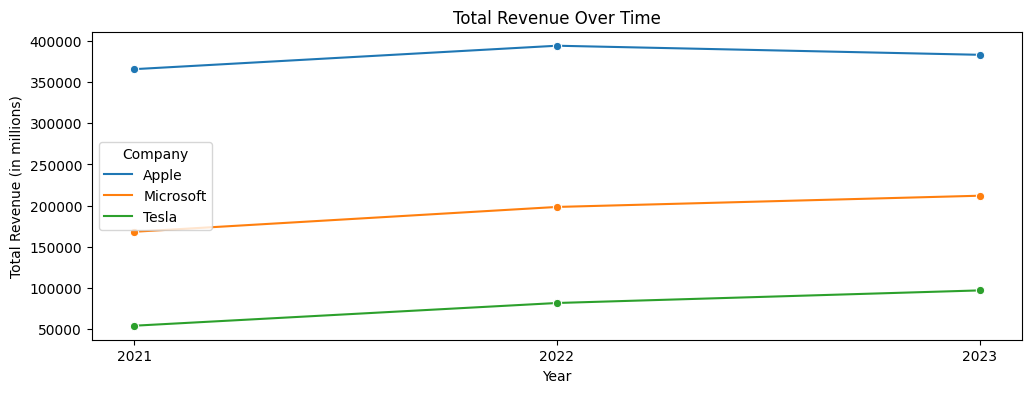

In [11]:
# Line chart for Total Revenue over time
plt.figure(figsize=(12,4))
sns.lineplot(data=data, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

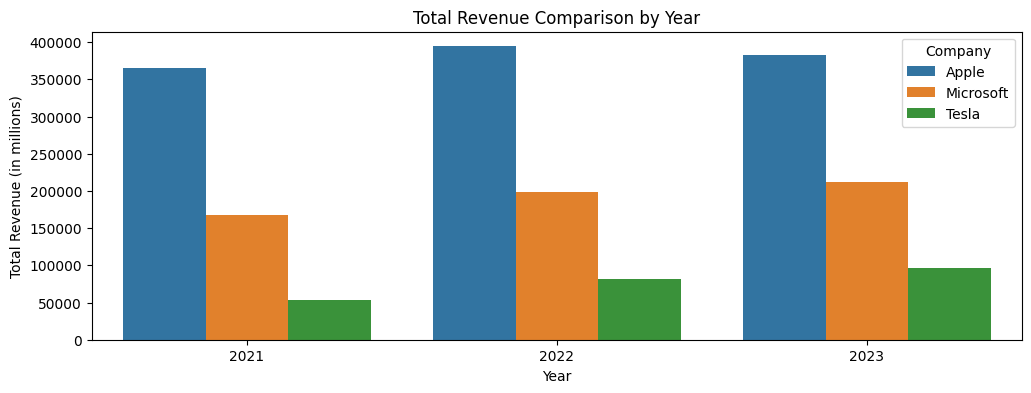

In [12]:
# Bar chart for Total Revenue comparison
plt.figure(figsize=(12,4))
sns.barplot(data=data, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title('Total Revenue Comparison by Year')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

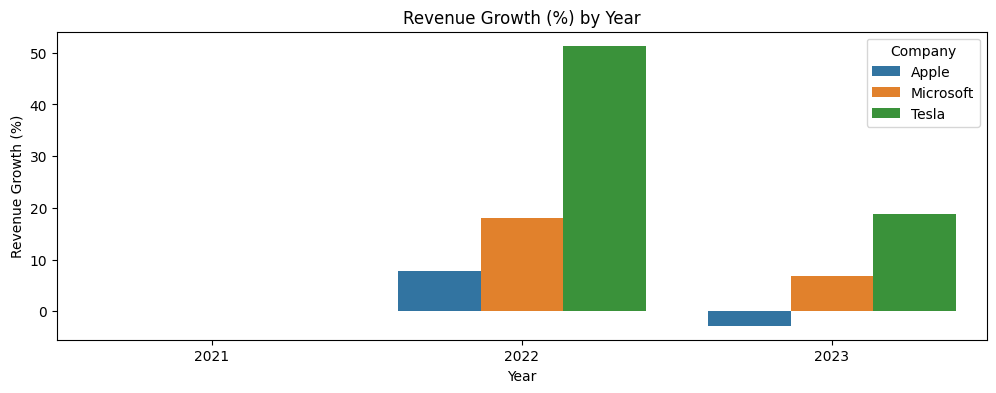

In [13]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=data, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

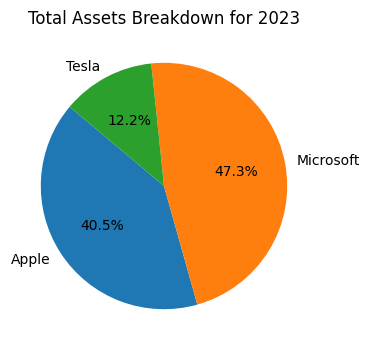

In [14]:
# Pie chart for the breakdown of Total Assets for the most recent year
latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]
latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(6,4))
plt.pie(latest_assets, labels=latest_assets.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Total Assets Breakdown for {latest_year}')
plt.show()

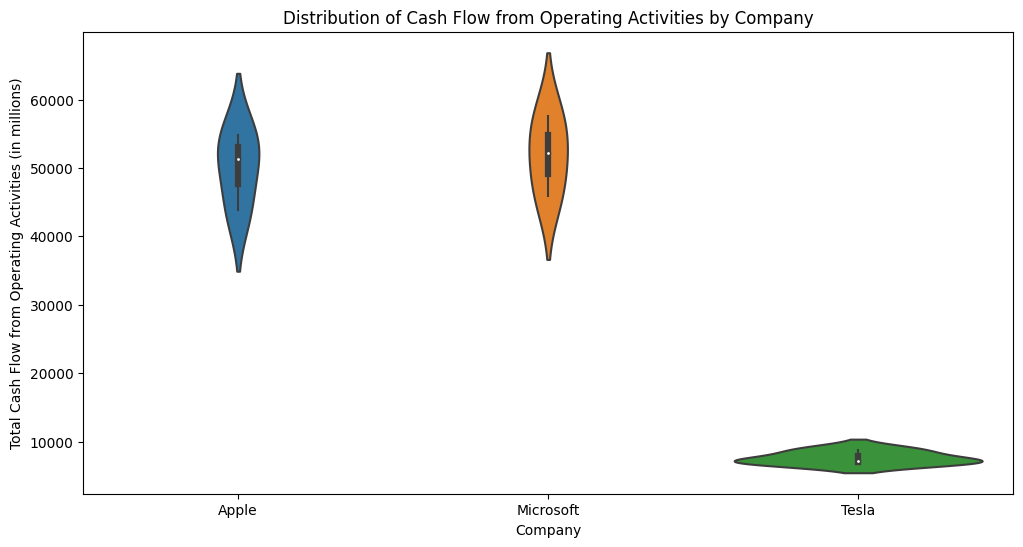

In [15]:
# Violin plot for Cash Flow from Operating Activities
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Company', y='Total Cash Flow from Operating Activities (in millions)')
plt.title('Distribution of Cash Flow from Operating Activities by Company')
plt.ylabel('Total Cash Flow from Operating Activities (in millions)')
plt.xlabel('Company')
plt.show()

<h4>Summary:</h4>

<b>1. Apple:</b>

 - Experienced steady revenue growth in 2022 but a slight decline in 2023.
 - Net income followed a similar trend with growth in 2022 and a slight decline in 2023.
 - Total assets and liabilities remained relatively stable over the three years.
 - Significant cash flow growth in 2022, indicating strong operational efficiency, which continued at a slower rate in 2023.

<b>2. Microsoft:</b>

 - Showed strong revenue and net income growth in 2022, followed by a slowdown in 2023.
 - Notable growth in total assets, particularly in 2023, suggesting substantial investments or acquisitions.
 - Liabilities grew moderately, and cash flow from operations showed consistent growth, reflecting healthy operational performance.

<b>3. Tesla:</b>

 - Exhibited the highest revenue growth among the three companies, particularly in 2022.
 - Net income growth was exceptionally high in 2022, reflecting improved profitability.
 - Continued growth in total assets and liabilities, indicating expansion.
 - Despite a slight decline in cash flow from operations in 2022, Tesla showed a strong rebound in 2023, reflecting better cash management and operational efficiency.